# Parameter space coverage

How can we be sure to adequately explore a very large parameter space, without missing important regions?

In [2]:
%matplotlib inline

import random

import numpy as np
import matplotlib.pyplot as plt

Set the sample size, i.e. the number of parameter combinations to generate:

In [96]:
sample_size = 1000

## 1. Uniform random distribution

`sample_size` values for parameters $X$ and $Y$ are independently drawn from a uniform distribution. This is the current method used to generate simulation parameters.

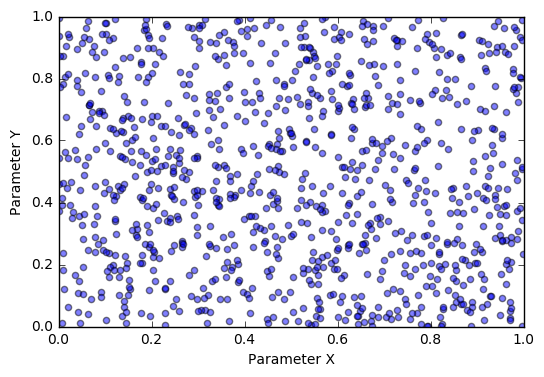

In [97]:
X = [random.uniform(0, 1) for i in range(sample_size)]
Y = [random.uniform(0, 1) for i in range(sample_size)]
plt.scatter(X, Y, alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Parameter X")
plt.ylabel("Parameter Y")
plt.show()

## 2. Random sample of parameter combinations based on step size

Alternative method:

1. Generate all possible combinations of values for $X$ and $Y$ quantized by a step size. These combinations will evenly cover the parameter space. With a small step size, there will be a larger number of combinations than the sample size.

2. Randomly draw `sample_size` of these combinations.

Set the step size:

In [98]:
step_size = 0.02

Number of parameter value combinations: 2,500


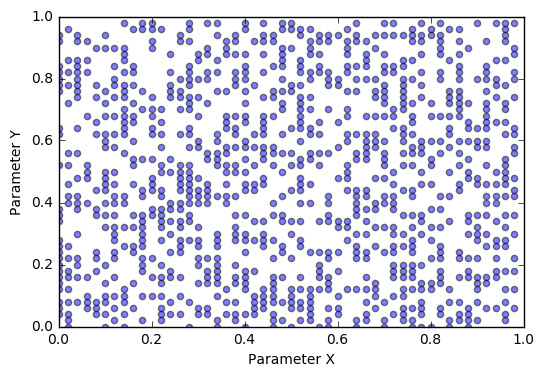

In [99]:
all_points = []
for x in np.arange(0, 1, step_size):
    for y in np.arange(0, 1, step_size):
        all_points.append((x, y))

print("Number of parameter value combinations: {:,}".format(len(all_points)))

sample = random.sample(all_points, sample_size)

X, Y = zip(*sample) # unzip sample

plt.scatter(X, Y, alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Parameter X")
plt.ylabel("Parameter Y")
plt.show()

## 3. Comparison

Both plots above have the same number of parameter combinations. It is not quite obvious which method provides the most even coverage of the parameter space.

The second plot shows the quantization effect of using a step size. A possible disadvantage of this quantization is a finite number of possibilities for test data, whereas an infinite quantity of different test instances can be generated using uniform random distributions.

## 4. Coverage becomes sparser as number of parameters increases

The examples above show a two-dimensional parameter space. If we add another parameter (dimension) while keeping `sample_size` constant, the same number of sample points will be spread across the additional dimension. Coverage of the parameter space will become sparser. We will be sampling a smaller proportion of the possible combinations of parameter values.

The following plot shows how rapidly parameter space coverage decreases with the number of parameters.

50.0 steps, 2 dimensions: 2500.0 possibilities, 40.000000% coverage
50.0 steps, 3 dimensions: 125000.0 possibilities, 0.800000% coverage
50.0 steps, 4 dimensions: 6250000.0 possibilities, 0.016000% coverage
50.0 steps, 5 dimensions: 312500000.0 possibilities, 0.000320% coverage
50.0 steps, 6 dimensions: 15625000000.0 possibilities, 0.000006% coverage
50.0 steps, 7 dimensions: 781250000000.0 possibilities, 0.000000% coverage
50.0 steps, 8 dimensions: 39062500000000.0 possibilities, 0.000000% coverage
50.0 steps, 9 dimensions: 1953125000000000.0 possibilities, 0.000000% coverage


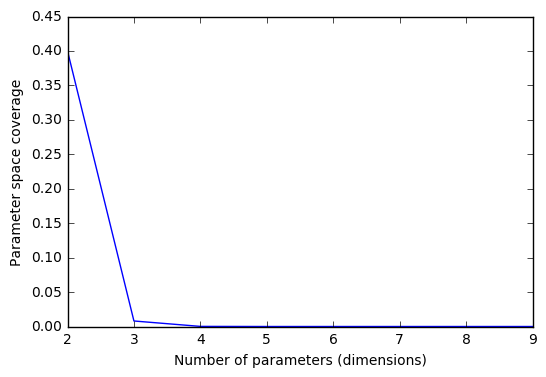

In [113]:
def coverage(sample_size, step_size, dimensions):
    step_count = 1 / step_size
    possibilities = step_count ** dimensions
    coverage_frac = sample_size / possibilities
    print("{} steps, {} dimensions: {} possibilities, {:.6f}% coverage"
          .format(step_count, dimensions, possibilities, coverage_frac * 100))
    return coverage_frac

dimension_values = range(2, 10)
coverage_values = [coverage(sample_size, step_size, d) for d in dimension_values]
plt.plot(dimension_values, coverage_values)
plt.xlabel("Number of parameters (dimensions)")
plt.ylabel("Parameter space coverage")
plt.show()

## 5. Cumulative training solution

An idea for making sure coverage is adequate:

1. Train the ML model based on `sample_size` randomly drawn parameter combinations.
2. Generate a test set of `sample_size` simulations with parameters randomly drawn from the same distribution.
3. Evaluate model performance (i.e. accuracy) on the test set. If it is good, that is evidence of adequate coverage.
4. If performance is poor, pool the test data with the original training data and re-train the model.
5. Repeat steps 2-4 until good performance is achieved.

## 6. Connecting parameter values

The following plots have x-axes representing parameter numbers (e.g. $P_0$, $P_1$, $P_2$, ..., $P_9$) and y-axes showing parameter values. Sets of values for all the parameters are drawn randomly, and lines connect the values.

Set the number of parameters and number of simulations (like sample_size above):

In [42]:
num_params = 10
num_simulations = 1000

### 6.1 Uniform random distribution

Parameter values are drawn independently from a uniform random distribution on the interval [0, 1).

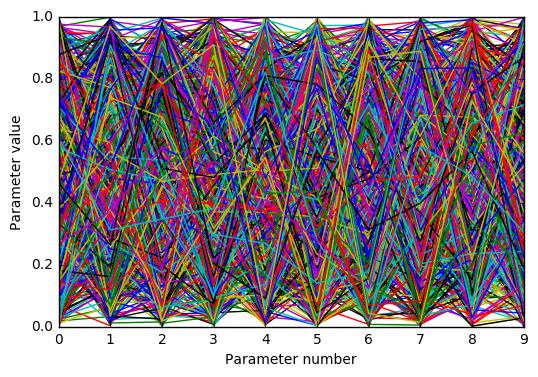

In [43]:
parameter_matrix = np.random.random_sample((num_simulations, num_params))

plt.figure()
plt.xlabel("Parameter number")
plt.ylabel("Parameter value")
for row in parameter_matrix:
    plt.plot(range(num_params), row)

### 6.2 Random sample of parameter combinations based on step size

Parameter values are drawn randomly without replacement from all possible combinations based on a step size. This is equivalent to the method in Section 2 above, but without actually generating all possible combinations.

Set the step size (need a larger step size than in Section 2 to see any pattern):

In [46]:
step_size = 0.1

possibilities = (1 / step_size) ** num_params
print("Number of possible combinations of {} parameters with step size {}: {}"
      .format(num_params, step_size, possibilities))

Number of possible combinations of 10 parameters with step size 0.1: 10000000000.0


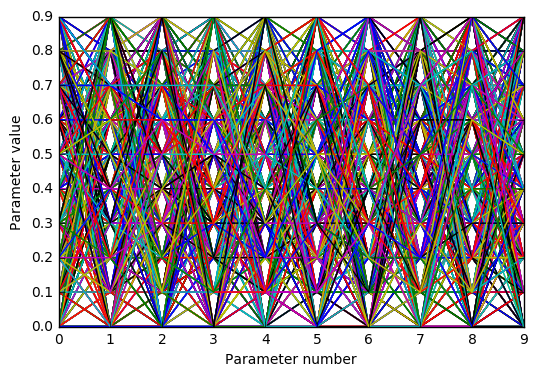

In [47]:
# Generate sample_size rows of parameter values quantized by step_size
step_values = np.arange(0, 1, step_size)
parameter_matrix = np.random.choice(step_values, (num_simulations, num_params))

# Ensure there are no duplicate sets of parameter values
# (that is, that we are sampling without replacement).
# If an AssertionError is raised, there are duplicates; just re-run this cell.
parameter_matrix = np.vstack({tuple(row) for row in parameter_matrix})
assert len(parameter_matrix) == num_simulations

plt.figure()
plt.xlabel("Parameter number")
plt.ylabel("Parameter value")
for row in parameter_matrix:
    plt.plot(range(num_params), row)